In [15]:
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.sparse as sp
import torch

import scanpy as sc

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import *
check_device()
print(models_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CUDA is not available.
+--------------+-----------------------+
| ORGANISM     | MODEL_SBML            |
+==============+=======================+
| ECOLI_core   | e_coli_core_SBML3.xml |
+--------------+-----------------------+
| mus_musculus | mus_iMM1415.xml       |
+--------------+-----------------------+
| homo_sapiens | Recon3D.xml           |
+--------------+-----------------------+


In [16]:
#load model
#[model: Recon3d](https://www.nature.com/articles/nbt.4072)
models_dir = os.path.abspath('../src/sbml_models/')
organism = "homo_sapiens"
sbml_file = libsbml.readSBMLFromFile(os.path.join(models_dir, models[organism]))

gene_exp_scale = 10
bound_max = 1000
model = metabolic_model(organism, sbml_file, bound_max=bound_max)
metab_model = model

loading Recon3D.xml...
1884 genes
5835 metabolites
10600 reactions with bound max 1000


In [17]:
#get GSMM graph params
S = model.S
S_matrix = model.S_matrix
reactions = list(model.reactions.keys())
metabolites = list(model.metabolites.keys())

S_bool = np.array(S_matrix.astype('bool').astype('int'))
S_bool = sp.csr_matrix(S_bool)
RAG = S_bool.T.dot(S_bool)

In [19]:
adj = RAG.astype('bool').astype('int') 
adj = adj - np.identity(adj.shape[0])
A = sp.csr_matrix(adj)
G = nx.from_scipy_sparse_array(A)

,count,mean,std,min,25%,50%,75%,max
0,10600.0,708.56,958.27,0.0,5.0,201.0,1087.25,3423.0


graph with 10600 nodes, 3755365 edges
is directed: False
is connected: False connected subgraphs: 22
has self loops: True


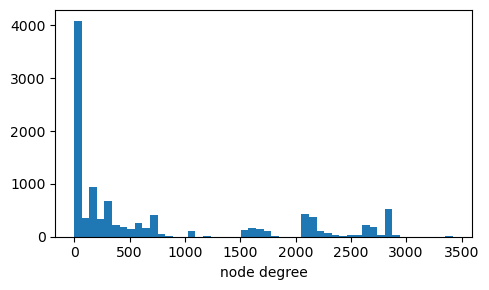

In [28]:
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
fig, ax = plt.subplots(1,1, figsize = (5,3))
#ax = axes[0]
#nx.draw_networkx(G, ax = ax)
#ax = axes[1]
ax.hist(degrees, bins=50)
ax.set_xlabel("node degree")
fig.tight_layout()

print(f'graph with {len(G.nodes)} nodes, {len(G.edges)} edges')
print(f'is directed: {G.is_directed()}')
print(f'is connected: {nx.is_connected(G)}', 
      f'connected subgraphs: {len([G.subgraph(c).copy() for c in nx.connected_components(G)])}')
print(f'has self loops: {any(G.has_edge(node, node) for node in G.nodes)}')

# Metabolic Vertex-Weighted Graph Generation

/Users/hollysteach/opt/miniconda3/envs/GCN_env/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


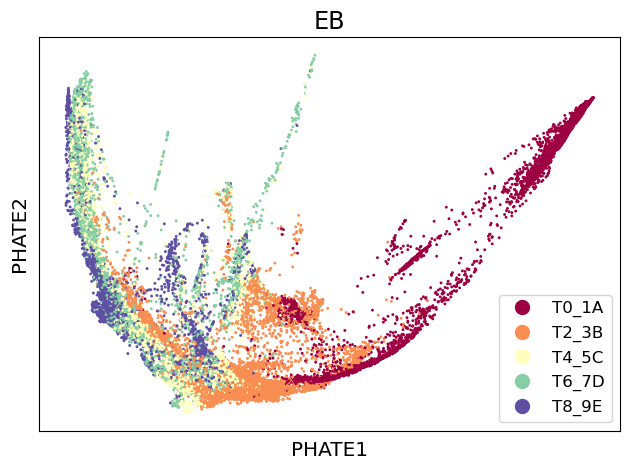

In [44]:
with open(os.path.abspath('../data/human_EB/adata_prepross_all.pk'), 'rb') as handle:
    adata = pk.load(handle)

import scprep
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['sample_labels'], title='EB', cmap= 'Spectral',
                      ticks=False, label_prefix='PHATE')
plt.show()

In [54]:
adata.var_names_make_unique()
dg = [g.split(" (")[0] for g in adata.var_names]
data = pd.DataFrame(adata.X, index = adata.obs_names, columns =  dg)

In [78]:
model_genes = list(model.genes.keys())
print('genes in both: ', np.isin(data.columns, model_genes).astype('int').sum(), '\n',
      'genes in model: ', len(model_genes) 
     )

genes in both:  1609 
 genes in model:  1884


- def map_reactions 
    - for reaction \
    def get_reaction_expression
        - if single:
        map_bool
        - if multiple catalysts:
        complex_map_bool 

    return R

- def scale_reaction_matrix \
    return srm

In [113]:
rga = 0
genes = []
for rc in list(model.reactions.values()):
    if rc.gene_associations is None:
        pass
    elif rc.gene_associations is not None:
        gene_association = rc.gene_associations
        try:
            rc.reaction_expression  = map_bool(gene_association, data)
            genes.append(gene_association.gene) 
            print('0');
        except:
            rga +=1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [116]:
len(gene_association.children)

4

In [114]:
genes

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [107]:
map_bool(gene_association)

AAACATACACCCAA-1_T8_9E   NaN
AAACATACCGAGTT-1_T8_9E   NaN
AAACATACGTAGCT-1_T8_9E   NaN
AAACATACGTCCTC-1_T8_9E   NaN
AAACATACTGGAAA-1_T8_9E   NaN
                          ..
TTTGACTGCTTCTA-1_T0_1A   NaN
TTTGACTGTGCCCT-1_T0_1A   NaN
TTTGCATGAGGTCT-1_T0_1A   NaN
TTTGCATGGGCGAA-1_T0_1A   NaN
TTTGCATGTGACAC-1_T0_1A   NaN
Length: 31161, dtype: float64

In [81]:
reaction_exp_matrix = map_reactions(model, data.T)


TypeError: 'NoneType' object is not iterable

In [79]:
reaction_exp_matrix = map_reactions(model, data.T)

TypeError: 'NoneType' object is not iterable